In [8]:
import numpy as np

# LDA

## Example two class, toy examples

In [9]:
# Calculate the mean matrices first

X1 = np.array([[4,1],[2,4],[2,3],[3,6],[4,4]])
X2 = np.array([[9,10],[6,8],[9,5],[8,7],[10,8]])

### Plot the original data

Text(0, 0.5, 'x2')

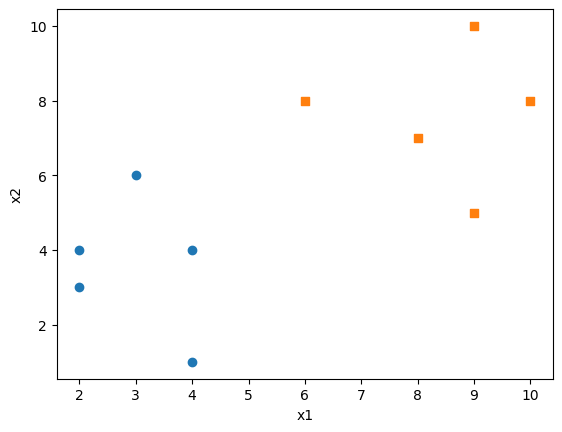

In [10]:
import matplotlib.pyplot as plt

plt.scatter(X1[:,0],X1[:,1], marker ='o')
plt.scatter(X2[:,0], X2[:,1], marker = 's')
plt.xlabel("x1")
plt.ylabel('x2')

### Numerical operations :  Getting the mean, and the covariance matrices within a class

In [11]:
u_1 = X1.mean(axis=0)
u_2 = X2.mean(axis=0)
u_1, u_2

(array([3. , 3.6]), array([8.4, 7.6]))

In [12]:
X1_u1 = X1 - u_1
X1_u1

array([[ 1. , -2.6],
       [-1. ,  0.4],
       [-1. , -0.6],
       [ 0. ,  2.4],
       [ 1. ,  0.4]])

In [13]:
X2_u2 = X2 - u_2
X2_u2

array([[ 0.6,  2.4],
       [-2.4,  0.4],
       [ 0.6, -2.6],
       [-0.4, -0.6],
       [ 1.6,  0.4]])

In [14]:
N1 = X1_u1.shape[0]
N2 = X2_u2.shape[0]
N1,N2

(5, 5)

In [15]:
S1 = 0
for i in range(N1):
    S1 += X1_u1[i,:].reshape(2,-1) @ X1_u1[i,:].reshape(-1,2)
S1 = S1/N1
S1

array([[ 0.8 , -0.4 ],
       [-0.4 ,  2.64]])

In [16]:
S1 = X1_u1.T @ X1_u1 / N1
S1 

array([[ 0.8 , -0.4 ],
       [-0.4 ,  2.64]])

In [17]:
S2 = X2_u2.T @ X2_u2 / N2
S2

array([[ 1.84, -0.04],
       [-0.04,  2.64]])

In [18]:
S_w = S1 + S2 # Inter class scatter
S_b = (u_1 - u_2).reshape(2,-1) @ (u_1 - u_2).reshape(-1,2) # Between class scatter

S_w, S_b

(array([[ 2.64, -0.44],
        [-0.44,  5.28]]),
 array([[29.16, 21.6 ],
        [21.6 , 16.  ]]))

### Numerical operations : Obtaining the eigen value, or just directly computing the optimal normal vector to the projection hyperplane

In [19]:
prod = np.linalg.inv(S_w) @ S_b
prod

array([[11.89244558,  8.80921895],
       [ 5.08194622,  3.76440461]])

In [20]:
eig_val, eig_vec = np.linalg.eig(prod)
eig_val

array([ 1.56568502e+01, -2.02227279e-16])

In [21]:
eig_vec

array([[ 0.91955932, -0.59522755],
       [ 0.39295122,  0.80355719]])

### Take the eigen vector corresponding to the maximum eigen value

In [22]:
w_optimal = eig_vec[0].reshape(2,-1)
w_optimal

array([[ 0.91955932],
       [-0.59522755]])

In [23]:
X1.shape, X2.shape

((5, 2), (5, 2))

In [24]:
w_optimal.shape

(2, 1)

### Time to project

In [25]:
projected_X1 = w_optimal.T @ X1.T
projected_X2 = w_optimal.T @ X2.T

In [26]:
projected_X1

array([[ 3.08300972, -0.54179157,  0.05343598, -0.81268735,  1.29732707]])

In [27]:
projected_X2

array([[2.32375835, 0.7555355 , 5.29989611, 3.18988169, 4.43377277]])

# Plot the old and new data

Text(0.5, 1.0, 'Old data')

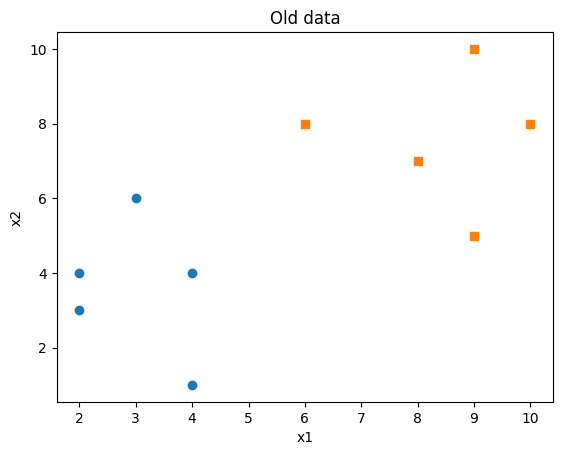

In [28]:

plt.scatter(X1[:,0],X1[:,1], marker ='o')
plt.scatter(X2[:,0], X2[:,1], marker = 's')
plt.xlabel("x1")
plt.ylabel('x2')
plt.title("Old data")

Text(0, 0.5, 'x2')

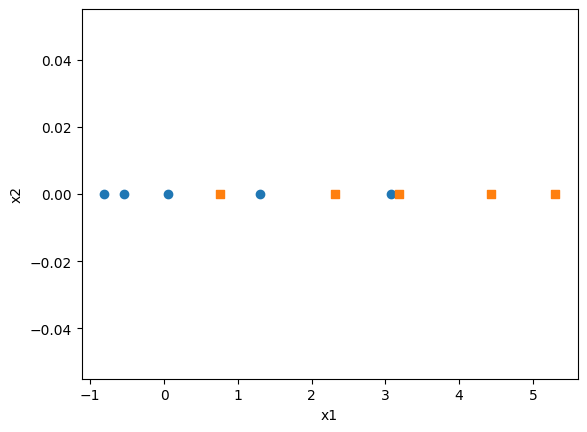

In [29]:
plt.scatter(projected_X1[0,:],[0,0,0,0,0], marker ='o')
plt.scatter(projected_X2[0,:], [0,0,0,0,0], marker = 's')
plt.xlabel("x1")
plt.ylabel('x2')

# Write a module for LDA

In [30]:
def LDA_binary(X1, X2, n_components=1):
    #Find the mean and the interclass variance
    u_1 = X1.mean(axis=0)
    u_2 = X2.mean(axis=0)
    
    N1 = X1.shape[0]
    N2 = X2.shape[0]

    S1 = (X1-u_1).T @ (X1-u_1)/N1
    S2 = (X2-u_2).T @ (X2-u_2)/N2
    
    S_w = S1 + S2
    #print(u_1-u_2)
    #S_b = (u_1 - u_2).reshape(2,-1) @ (u_1 - u_2).reshape(-1,2) 
    S_b = (u_1 - u_2).reshape(X1.shape[1],-1) @ (u_1 - u_2).reshape(-1,X1.shape[1])
    #print(S_b)
    prod = np.linalg.inv(S_w) @ S_b
    
    eig_val, eig_vec = np.linalg.eig(prod)
    eig_vec.reshape(-1,1)

    proj_X1 = eig_vec[:n_components] @ X1.T
    proj_X2 = eig_vec[:n_components] @ X2.T
    
    return proj_X1, proj_X2

In [31]:
P_X1, P_X2 = LDA_binary(X1, X2, 1)

Text(0, 0.5, 'x2')

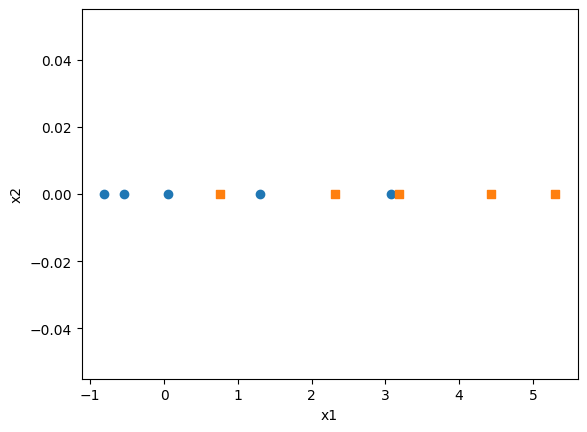

In [32]:
plt.scatter(P_X1[0,:],[0,0,0,0,0], marker ='o')
plt.scatter(P_X2[0,:], [0,0,0,0,0], marker = 's')
plt.xlabel("x1")
plt.ylabel('x2')

## Testing on real world data : Breast cancer dataset : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [33]:
from sklearn.datasets import load_breast_cancer as data

In [34]:
X, Y = data(return_X_y = True)

In [35]:
X.shape

(569, 30)

In [36]:
Y.shape

(569,)

In [37]:
X1 = X[Y==0]
X1.shape

(212, 30)

In [38]:
X2 = X[Y==1]
X2.shape

(357, 30)

In [39]:
P_X1, P_X2 = LDA_binary(X1, X2, 1)

In [40]:
P_X1.shape

(1, 212)

In [41]:
P_X2.shape

(1, 357)

## Plotting the new data

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0, 0.5, 'x2')

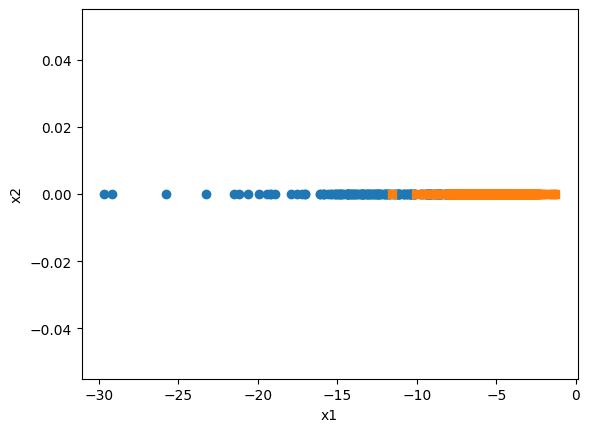

In [42]:
plt.scatter(P_X1[0,:], [0] * P_X1.shape[1], marker='o')#P_X1[1:], marker ='o')
plt.scatter(P_X2[0,:], [0] * P_X2.shape[1], marker='s')#P_X2[1:], marker = 's')
plt.xlabel("x1")
plt.ylabel('x2')

## Verifying LDA results

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [44]:
solver = LDA(n_components=1)

In [45]:
FS = solver.fit(X,Y).transform(X)

In [46]:
FS.shape

(569, 1)

In [47]:
P_X1 = FS[Y == 0]
P_X2 = FS[Y == 1]

Text(0, 0.5, 'x2')

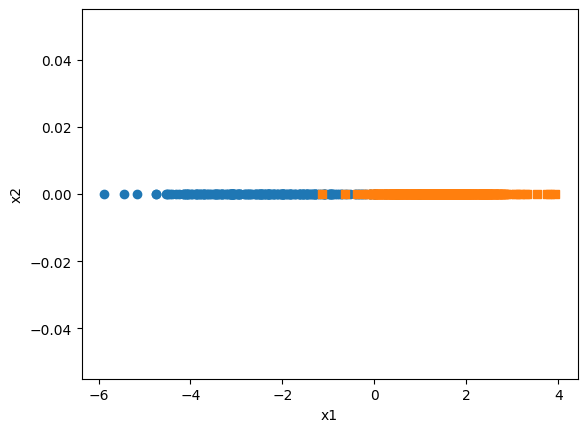

In [48]:
plt.scatter(P_X1[:,0], [0] * P_X1.shape[0], marker='o')#P_X1[1:], marker ='o')
plt.scatter(P_X2[:,0], [0] * P_X2.shape[0], marker='s')#P_X2[1:], marker = 's')
plt.xlabel("x1")
plt.ylabel('x2')

## Almost similar, but due to the multi class LDA implementation, and the solver being SVD in the sklearn's LDA implementation,we got slightly shifted projected distribution

## IRIS DATASET

In [49]:
from sklearn import datasets

In [50]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [51]:
X.shape, Y.shape

((150, 4), (150,))

In [52]:
np.unique(Y)


array([0, 1, 2])

In [65]:
X1 = X[Y == 0]
X2 = X[Y == 2]
#X3 = X[Y == 2]

In [66]:
P_X1, P_X2 = LDA_binary(X1, X2, 2)

Text(0, 0.5, 'x2')

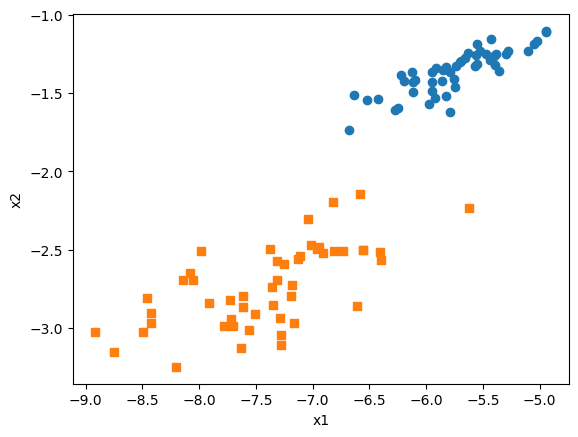

In [67]:
plt.scatter(P_X1[0,:], P_X1[1,:], marker='o')#P_X1[1:], marker ='o')
plt.scatter(P_X2[0,:], P_X2[1,:], marker='s')#P_X2[1:], marker = 's')
plt.xlabel("x1")
plt.ylabel('x2')